# Arbeitszeiten Analyse

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('Arbeitszeiten_stack_fuel.csv', sep=';', header=2)

df = df.drop(df.columns[-5:], axis=1)
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

col_additions = ['Arbeitsbeginn_h', 'Arbeitsende_h', 'Arbeitszeit_h']
for i, col_name in enumerate(['Arbeitsbeginn', 'Arbeitsende', 'Geleistete Arbeitszeit']):
    df[col_name] = pd.to_datetime(df[col_name])
    df.loc[df[col_name].isnull(), col_name] = pd.NaT
    df[col_additions[i]] = df.loc[:, col_name].dt.hour + df.loc[:, col_name].dt.minute/60 #pd.Series([x.hour + x.minute/60 for x in df.loc[:,'Arbeitsbeginn']])

#df['Arbeitsende'] = pd.to_datetime(df['Arbeitsende'])
#df.loc[df['Arbeitsende'].isnull(),'Arbeitsende'] = pd.NaT
#df['Arbeitsende_h'] = pd.Series([x.hour + x.minute/60 for x in df.loc[:,'Arbeitsende']])

#df['Geleistete Arbeitszeit'] = pd.to_datetime(df['Geleistete Arbeitszeit'])
#df.loc[df['Geleistete Arbeitszeit'].isnull(), 'Geleistete Arbeitszeit'] = pd.NaT
#df['Arbeitszeit_h'] = pd.Series([x.hour + x.minute/60 for x in df.loc[:,'Geleistete Arbeitszeit']])

print('Processing Arbeitszeit pro Woche...')

df['cum_Arbeitszeit_pro_Woche_h'] = np.nan
for i in df.index:
    #print(i)
    if df.loc[i, 'Wochentag'] == 'Montag':
        df.loc[i, 'cum_Arbeitszeit_pro_Woche_h'] = df.loc[i, 'Arbeitszeit_h']
    else:
        df.loc[i, 'cum_Arbeitszeit_pro_Woche_h'] = np.nansum([df.loc[i - 1, 'cum_Arbeitszeit_pro_Woche_h'], df.loc[i, 'Arbeitszeit_h']])

print('Processing nominale Arbeitszeit pro Woche...')        

df['Nominale Arbeitszeit'] = pd.to_datetime(df['Nominale Arbeitszeit'])
df['cum_Arbeitszeit_nominal_pro_Woche_h'] = np.nan
for i in df.index:
    
    #print(i)
    #print(df.loc[i, 'Nominale Arbeitszeit'])
    
    if not pd.isna(df.loc[i, 'Nominale Arbeitszeit']):
        nom_h = df.loc[i, 'Nominale Arbeitszeit'].hour + df.loc[i, 'Nominale Arbeitszeit'].minute/60 # error due to NaN
    else:
        nom_h = np.nan
        
    if df.loc[i, 'Wochentag'] == 'Montag':
        df.loc[i, 'cum_Arbeitszeit_nominal_pro_Woche_h'] = nom_h
    else:
        df.loc[i, 'cum_Arbeitszeit_nominal_pro_Woche_h'] = np.nansum([df.loc[i - 1, 'cum_Arbeitszeit_nominal_pro_Woche_h'], nom_h])        

df.index=df['date']
        
df.head()

Processing Arbeitszeit pro Woche...
Processing nominale Arbeitszeit pro Woche...


,KW,Wochentag,date,Arbeitsbeginn,Arbeitsende,Pausenzeit,Geleistete Arbeitszeit,Nominale Arbeitszeit,Mehrarbeit,Kumulative Arbeitszeit pro Woche,Kommentar,Arbeitsbeginn_h,Arbeitsende_h,Arbeitszeit_h,cum_Arbeitszeit_pro_Woche_h,cum_Arbeitszeit_nominal_pro_Woche_h
date,,,,,,,,,,,,,,,,
2018-04-09,15,Montag,2018-04-09,2019-07-10 08:50:00,2019-07-10 19:00:00,1:00,2019-07-10 09:10:00,2019-07-10 08:00:00,1:10,9:10,NaN,8.833333,19.000000,9.166667,9.166667,8.0
2018-04-10,15,Dienstag,2018-04-10,2019-07-10 08:40:00,2019-07-10 21:40:00,1:00,2019-07-10 12:00:00,2019-07-10 08:00:00,4:00,21:10,NaN,8.666667,21.666667,12.000000,21.166667,16.0
2018-04-11,15,Mittwoch,2018-04-11,2019-07-10 08:10:00,2019-07-10 17:45:00,1:00,2019-07-10 08:35:00,2019-07-10 08:00:00,0:35,29:45,NaN,8.166667,17.750000,8.583333,29.750000,24.0
2018-04-12,15,Donnerstag,2018-04-12,2019-07-10 08:30:00,2019-07-10 22:25:00,1:00,2019-07-10 12:55:00,2019-07-10 08:00:00,4:55,42:40,NaN,8.500000,22.416667,12.916667,42.666667,32.0
2018-04-13,15,Freitag,2018-04-13,2019-07-10 08:25:00,2019-07-10 19:00:00,1:00,2019-07-10 09:35:00,2019-07-10 08:00:00,1:35,52:15,NaN,8.416667,19.000000,9.583333,52.250000,40.0


In [2]:
df['cum_Arbeitszeit_nominal_pro_Woche_h']

date
2018-04-09     8.0
2018-04-10    16.0
2018-04-11    24.0
2018-04-12    32.0
2018-04-13    40.0
2018-04-16     8.0
2018-04-17    16.0
2018-04-18    24.0
2018-04-19    32.0
2018-04-20    40.0
2018-04-23     8.0
2018-04-24    16.0
2018-04-25    24.0
2018-04-26    32.0
2018-04-27    40.0
2018-04-30     8.0
2018-05-01     8.0
2018-05-02    16.0
2018-05-03    24.0
2018-05-04    32.0
2018-05-07     8.0
2018-05-08    16.0
2018-05-09    24.0
2018-05-10    24.0
2018-05-11    32.0
2018-05-14     8.0
2018-05-15    14.0
2018-05-16    22.0
2018-05-17    22.0
2018-05-18    22.0
              ... 
2019-05-20     NaN
2019-05-21     8.0
2019-05-22    16.0
2019-05-23    24.0
2019-05-24    30.0
2019-05-27     8.0
2019-05-28    16.0
2019-05-29    24.0
2019-05-30    24.0
2019-05-31    24.0
2018-06-03     8.0
2018-06-04    16.0
2018-06-05    24.0
2018-06-06    28.0
2018-06-07    32.0
2018-06-10     NaN
2018-06-11     8.0
2018-06-12    16.0
2018-06-13    24.0
2018-06-14    24.0
2018-06-17     6.5
2018-06

In [3]:
df.shape

(312, 16)

In [4]:
#df['Arbeitsbeginn_h'].describe()

In [5]:
#df['Arbeitsende_h'].describe()

In [6]:
'''fig, ax = plt.subplots(figsize=[9, 6])

sns.distplot(df['Arbeitsbeginn_h'].dropna(), rug=False, kde=False, ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(xlabel='Arbeitsbeginn (Uhrzeit)',
         ylabel='Anzahl',
         title='Der Arbeitstag beginnt im Durchschnitt gegen 9:08 Uhr')

#fig.savefig('Arbeitsbeginn.png')'''

"fig, ax = plt.subplots(figsize=[9, 6])\n\nsns.distplot(df['Arbeitsbeginn_h'].dropna(), rug=False, kde=False, ax=ax)\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\nax.set(xlabel='Arbeitsbeginn (Uhrzeit)',\n         ylabel='Anzahl',\n         title='Der Arbeitstag beginnt im Durchschnitt gegen 9:08 Uhr')\n\n#fig.savefig('Arbeitsbeginn.png')"

In [7]:
#df.plot(kind='scatter', x='Arbeitsbeginn_h', y='Arbeitsende_h')

In [8]:
#sns.regplot(x='Arbeitsbeginn_h', y='Arbeitsende_h', data=df)

In [9]:
'''fig, ax = plt.subplots(nrows = 3, figsize=[9, 18])

sns.distplot(df['Arbeitsbeginn_h'].dropna(), rug=True, ax=ax[0])
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set(xlabel='Arbeitsbeginn (Uhrzeit)',
         ylabel='Anzahl',
         title='Der Arbeitstag beginnt im Durchschnitt gegen 9 Uhr')

sns.distplot(df['Arbeitsende_h'].dropna(), rug=True, ax=ax[1])
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set(xlabel='Arbeitsende (Uhrzeit)',
         ylabel='Anzahl',
         title='Der Arbeitstag endet im Durchschnitt gegen 19 Uhr')

sns.regplot(x='Arbeitsbeginn_h', y='Arbeitsende_h', data=df, ax=ax[2])
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].yaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].set(xlabel='Arbeitbeginn (Uhrzeit)',
         ylabel='Arbeitsende (Uhrzeit)',
         title='Es gibt keinen Zusammenhang zwischen Beginn und Ende des Arbeitstages')
#fig.savefig('Arbeitszeiten.png')'''

"fig, ax = plt.subplots(nrows = 3, figsize=[9, 18])\n\nsns.distplot(df['Arbeitsbeginn_h'].dropna(), rug=True, ax=ax[0])\nax[0].xaxis.set_major_locator(MaxNLocator(integer=True))\nax[0].set(xlabel='Arbeitsbeginn (Uhrzeit)',\n         ylabel='Anzahl',\n         title='Der Arbeitstag beginnt im Durchschnitt gegen 9 Uhr')\n\nsns.distplot(df['Arbeitsende_h'].dropna(), rug=True, ax=ax[1])\nax[1].xaxis.set_major_locator(MaxNLocator(integer=True))\nax[1].set(xlabel='Arbeitsende (Uhrzeit)',\n         ylabel='Anzahl',\n         title='Der Arbeitstag endet im Durchschnitt gegen 19 Uhr')\n\nsns.regplot(x='Arbeitsbeginn_h', y='Arbeitsende_h', data=df, ax=ax[2])\nax[2].xaxis.set_major_locator(MaxNLocator(integer=True))\nax[2].yaxis.set_major_locator(MaxNLocator(integer=True))\nax[2].set(xlabel='Arbeitbeginn (Uhrzeit)',\n         ylabel='Arbeitsende (Uhrzeit)',\n         title='Es gibt keinen Zusammenhang zwischen Beginn und Ende des Arbeitstages')\n#fig.savefig('Arbeitszeiten.png')"

In [10]:
'''print(df['Arbeitszeit_h'].describe())

fig, ax = plt.subplots(figsize=[9, 18/3])
sns.distplot(df['Arbeitszeit_h'].dropna(), rug=True, ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(xlabel='Geleistete Arbeitszeit (Stunden)',
         ylabel='Anzahl',
         title='Im Durchschnitt arbeite ich 8:30 pro Tag')'''

"print(df['Arbeitszeit_h'].describe())\n\nfig, ax = plt.subplots(figsize=[9, 18/3])\nsns.distplot(df['Arbeitszeit_h'].dropna(), rug=True, ax=ax)\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\nax.set(xlabel='Geleistete Arbeitszeit (Stunden)',\n         ylabel='Anzahl',\n         title='Im Durchschnitt arbeite ich 8:30 pro Tag')"

In [11]:
#df_KW = df.groupby('KW')[['cum_Arbeitszeit_pro_Woche_h', 'cum_Arbeitszeit_nominal_pro_Woche_h']].max()
df_KW = df.loc[:, ['cum_Arbeitszeit_pro_Woche_h', 'cum_Arbeitszeit_nominal_pro_Woche_h']].resample("7d").max()
df_KW['perc_extra_hours'] = ((df_KW['cum_Arbeitszeit_pro_Woche_h'] / df_KW['cum_Arbeitszeit_nominal_pro_Woche_h']) - 1)
df_KW

,cum_Arbeitszeit_pro_Woche_h,cum_Arbeitszeit_nominal_pro_Woche_h,perc_extra_hours
date,,,
2018-04-09,52.250000,40.0,0.306250
2018-04-16,44.483333,40.0,0.112083
2018-04-23,46.550000,40.0,0.163750
2018-04-30,34.000000,32.0,0.062500
2018-05-07,33.750000,32.0,0.054688
2018-05-14,26.333333,22.0,0.196970
2018-05-21,32.083333,31.0,0.034946
2018-05-28,33.500000,32.0,0.046875
2018-06-04,43.000000,40.0,0.075000


In [12]:
def nuss_style_fun(ax, title, author_line=True):
    
    #remove top and right frame parts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set left and bottom axis to grey
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # set ticks to grey
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    
    #set labels to grey
    ax.yaxis.label.set_color('grey')
    ax.xaxis.label.set_color('grey') 
    
    # align axis labels with axis ends
    ax.set_xlabel(xlabel=None,
                  position=[0, 0],
                  horizontalalignment='left',
                  color='grey',
                  size=14)
    ax.set_ylabel(ylabel=None,
                  position=[0, 1],
                  horizontalalignment='right',
                  color='grey',
                  size=14)
    
    #align title
    ax.set_title(label=title,
                 loc='left',
                 color=(0.41, 0.41, 0.41),
                 size=20)
    
    #author line
    if author_line:
        fig.text(0.99, 0.01, '@rikunert', color='lightgrey', style='italic',
             horizontalalignment='right')
    
    return ax

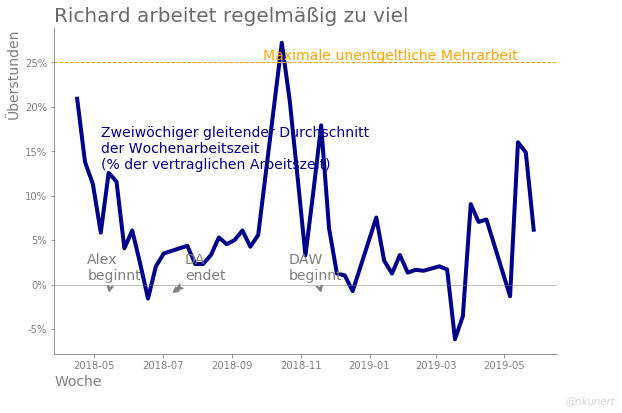

In [13]:
fig, ax = plt.subplots(figsize=[9, 18/3])
sns.lineplot(data=df_KW['perc_extra_hours'].rolling(2).mean(), ax=ax, 
             color='darkblue',
            linewidth=4)
ax.axhline(y=0, color='grey', linewidth=0.5)
ax.axhline(y=0.25, linestyle='--', color='orange', linewidth=1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

ax = nuss_style_fun(ax, title='Richard arbeitet regelmäßig zu viel')

ax.set(xlabel='Woche',
       ylabel='Überstunden')

ax.text(x=df_KW.index[4],
       y=0.13,
       s='Zweiwöchiger gleitender Durchschnitt\nder Wochenarbeitszeit\n(% der vertraglichen Arbeitszeit)',
       color='darkblue',
       size=14)

ax.text(x=df_KW.index[-3],
       y=0.25,
       s='Maximale unentgeltliche Mehrarbeit',
        horizontalalignment='right',
        verticalalignment='bottom',
        color='orange',
       size=14)

ax.annotate("Alex\nbeginnt",
            color='grey', size=14,
            xy=(pd.Timestamp(2018,5,14), -0.01), xycoords='data',
            xytext=(pd.Timestamp(2018,4,25), 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                           color='grey'))

ax.annotate("DA\nendet",
            color='grey', size=14,
            xy=(pd.Timestamp(2018, 7, 9), -0.01), xycoords='data',
            xytext=(pd.Timestamp(2018, 7, 21), 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                           color='grey'))

ax.annotate("DAW\nbeginnt",
            color='grey', size=14,
            xy=(pd.Timestamp(2018, 11, 19), -0.01), xycoords='data',
            xytext=(pd.Timestamp(2018, 10, 21), 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                           color='grey'))
'''
ax.annotate("Neuer\nVertrag",
            color='grey', size=14,
            xy=(pd.Timestamp(2019, 1, 18), -0.01), xycoords='data',
            xytext=(pd.Timestamp(2018, 12, 1), 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                           color='grey'))
'''
fig.patch.set_facecolor('w')
#fig.savefig('extra_hours.png')

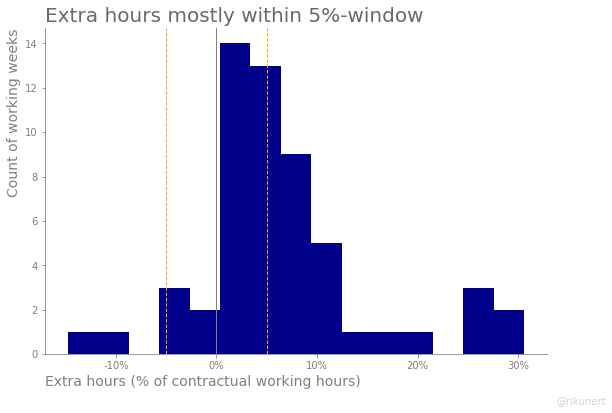

In [14]:
df_KW['perc_extra_hours'] = ((df_KW['cum_Arbeitszeit_pro_Woche_h'] / df_KW['cum_Arbeitszeit_nominal_pro_Woche_h']) - 1)

fig, ax = plt.subplots(figsize=[9, 18/3])
df_KW['perc_extra_hours'].plot(kind='hist', bins=15,
                               ax=ax, color='darkblue')

ax = nuss_style_fun(ax, 
                    title='Extra hours mostly within 5%-window')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 

ax.axvline(x=0, color='grey', linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='orange', linewidth=1)
ax.axvline(x=-0.05, linestyle='--', color='orange', linewidth=1)

ax.set(xlabel='Extra hours (% of contractual working hours)',
       ylabel='Count of working weeks')

fig.patch.set_facecolor('w')
fig.savefig('extra_hours_hist.png')

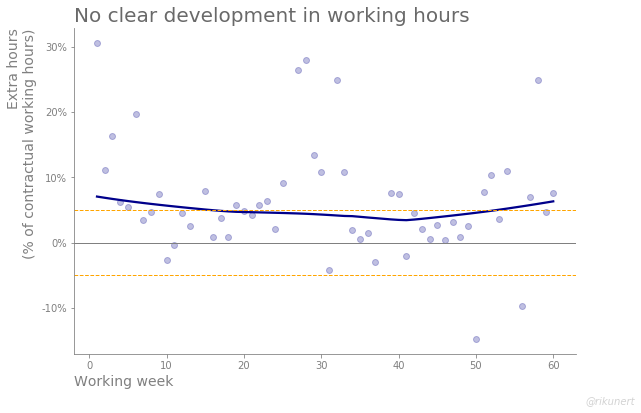

In [15]:
fig, ax = plt.subplots(figsize=[9, 18/3])
ax = nuss_style_fun(ax, title='No clear development in working hours')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 

sns.regplot(x=list(range(1, len(df_KW)+1)),
            y=df_KW['perc_extra_hours'],
            lowess=True,
            scatter_kws={'color': 'darkblue',
                        'alpha': 0.25},
            line_kws={'color': 'darkblue'},
            ax=ax)

ax.axhline(y=0, color='grey', linewidth=1)
ax.axhline(y=0.05, linestyle='--', color='orange', linewidth=1)
ax.axhline(y=-0.05, linestyle='--', color='orange', linewidth=1)

ax.set(ylabel='Extra hours\n(% of contractual working hours)',
       xlabel='Working week')

fig.savefig('extra_hours_scatter.png')

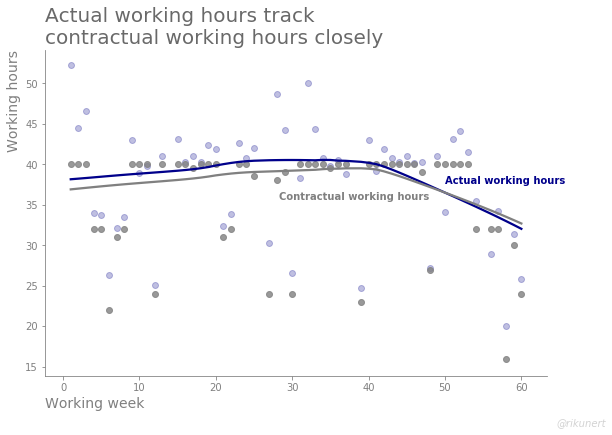

In [16]:
fig, ax = plt.subplots(figsize=[9, 18/3])
ax = nuss_style_fun(ax, title='Actual working hours track \ncontractual working hours closely')
#ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 

sns.regplot(x=list(range(1, len(df_KW)+1)),
            y=df_KW['cum_Arbeitszeit_pro_Woche_h'],
            lowess=True,
            scatter_kws={'color': 'darkblue',
                        'alpha': 0.25},
            line_kws={'color': 'darkblue'},
            ax=ax)

sns.regplot(x=list(range(1, len(df_KW)+1)),
            y=df_KW['cum_Arbeitszeit_nominal_pro_Woche_h'],
            lowess=True,
            scatter_kws={'color': 'grey',
                        'alpha': 0.8},
            line_kws={'color': 'grey'},
            ax=ax)

# legend
ax.text(x=48,
                y=36,
                s='Contractual working hours',
                color='grey',
                verticalalignment='center',
        ha='right',
       weight='bold')

ax.text(x=50,
                y=38,
                s='Actual working hours',
                color='darkblue',
        #backgroundcolor='white',
                verticalalignment='center',
        ha='left',
       weight='bold')

ax.set(ylabel='Working hours',
       xlabel='Working week')

fig.savefig('working_hours_scatter.png')

In [17]:
df_KW.head()

,cum_Arbeitszeit_pro_Woche_h,cum_Arbeitszeit_nominal_pro_Woche_h,perc_extra_hours
date,,,
2018-04-09,52.250000,40.0,0.306250
2018-04-16,44.483333,40.0,0.112083
2018-04-23,46.550000,40.0,0.163750
2018-04-30,34.000000,32.0,0.062500
2018-05-07,33.750000,32.0,0.054688


In [44]:
df_KW.loc[:, 'compensation_potential_h'] = (df_KW['perc_extra_hours'] - 0.05) * df_KW['cum_Arbeitszeit_nominal_pro_Woche_h']

mask_negative = (df_KW['perc_extra_hours']) < -0.05
df_KW.loc[mask, 'compensation_potential_h'] = (df_KW.loc[mask, 'perc_extra_hours'] + 0.05) * df_KW.loc[mask, 'cum_Arbeitszeit_nominal_pro_Woche_h']

mask_neutral = ((df_KW['perc_extra_hours']) >= -0.05) & ((df_KW['perc_extra_hours']) <= 0.05)
df_KW.loc[mask, 'compensation_potential_h'] = 0

mask_positive = (df_KW['perc_extra_hours']) > 0.05

print(mask_negative.sum())
print(mask_neutral.sum())
print(mask_positive.sum())

(df_KW.loc[:, 'compensation_potential_h']).sum()/8

2
28
26


6.686458333333332

In [43]:
df_KW.loc[mask_negative, :]

,cum_Arbeitszeit_pro_Woche_h,cum_Arbeitszeit_nominal_pro_Woche_h,perc_extra_hours,compensation_potential,compensation_potential_h
date,,,,,
2019-03-18,34.083333,40.0,-0.147917,-0.0,-7.916667
2019-04-29,28.916667,32.0,-0.096354,-0.0,-4.683333


In [33]:
((df_KW.loc[:, 'compensation_potential_h']).sum() - 60) * 60

41.499999999999346